In [19]:
import numpy as np
import pandas as pd

# Data Import

Dataset retrieved from <a href="https://www.kaggle.com/datasets/aidaeinabadi/realestate">Kaggle</a>

In [20]:
df = pd.read_csv('./dataset/realstate/realstate.csv')

df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
df = df.drop('No', axis='columns')
df = df.rename(columns={'Y house price of unit area':'price_per_unit'})

In [22]:
df.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [23]:
df.columns

Index(['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'price_per_unit'],
      dtype='object')

# Machine Learning

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('price_per_unit', axis = 'columns')
y = df['price_per_unit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [25]:
columns = ['Model','Mean Absolute Error', 'Mean Squared Error', 'R2 Score', 'Explained Variance Score', 'Mean Pinball Loss', 'D2 Pinball Score', 'D2 Absolute Error Score']
evaluation_df = pd.DataFrame(columns=columns)

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

def exec_model(model):
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    r2s = mean_squared_error(y_test, pred)
    evs = mean_squared_error(y_test, pred)
    mpl = mean_squared_error(y_test, pred)
    d2ps = mean_squared_error(y_test, pred)
    s2aes = mean_squared_error(y_test, pred)
    evaluation_df.loc[len(evaluation_df.index)] = [type(model).__name__, 
                                                   mae, mse, r2s, evs, mpl, d2ps, s2aes]

    plot_actual_vs_pred(y_test, pred)
    plot_all(y_test, pred)
    
    
def plot_actual_vs_pred(actual, pred):
    plt.figure(figsize=(5,5))
    plt.scatter(actual, pred, c='crimson')

    p1 = max(max(pred), max(actual))
    p2 = min(min(pred), min(actual))
    plt.plot([p1, p2], [p1, p2], 'b-')
    plt.xlabel('Actual Values', fontsize=15)
    plt.ylabel('Predictions', fontsize=15)
    plt.axis('equal')
    plt.show()
    
def plot_all(actual, pred):
    if max(actual) >= max(pred):
        my_range = int(max(actual))
    else:
        my_range = int(max(pred))
    plt.scatter(range(len(actual)), actual, color='blue', label="Actual Values")
    plt.scatter(range(len(pred)), pred, color='red', label="Predictions")
    plt.legend()
    plt.show()

## Linear Regression

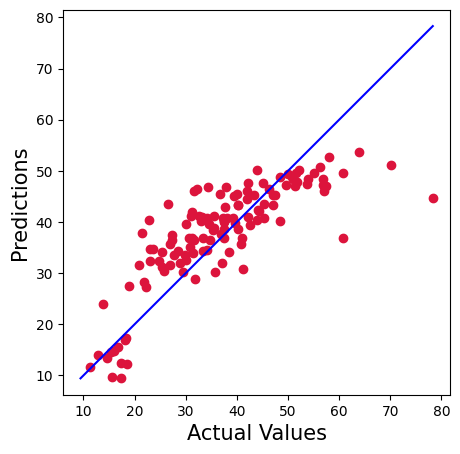

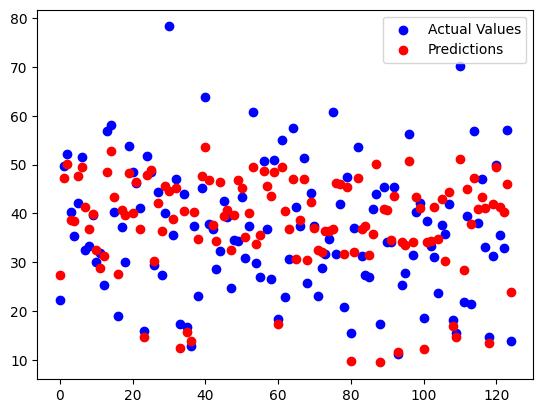

In [27]:
from sklearn.linear_model import LinearRegression

exec_model(LinearRegression())

## Support Vector Machine

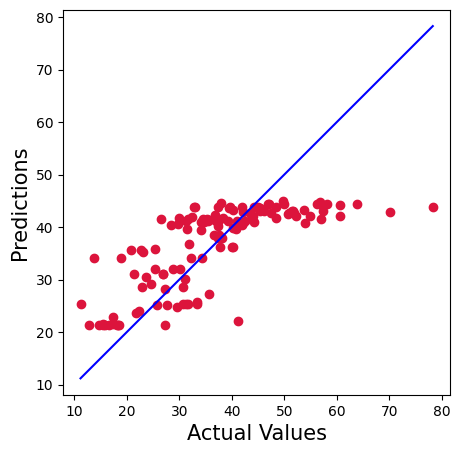

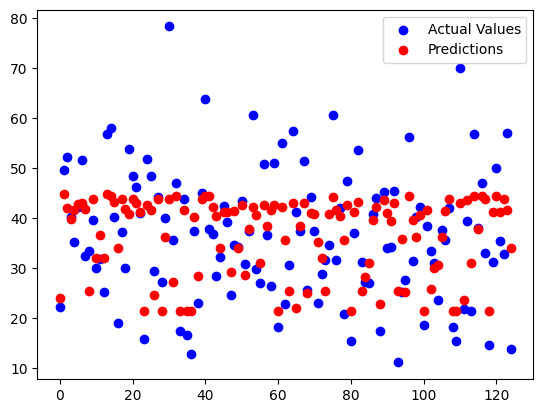

In [28]:
from sklearn.svm import SVR

exec_model(SVR(C=1.0, epsilon=0.2))

## Ridge Regression

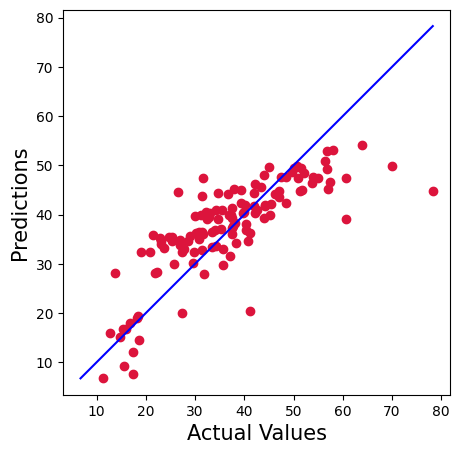

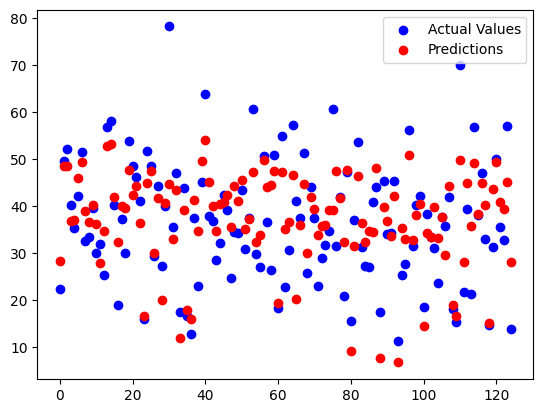

In [29]:
from sklearn.linear_model import Ridge

exec_model(Ridge(alpha=1.0))

## Kernel Ridge Regression

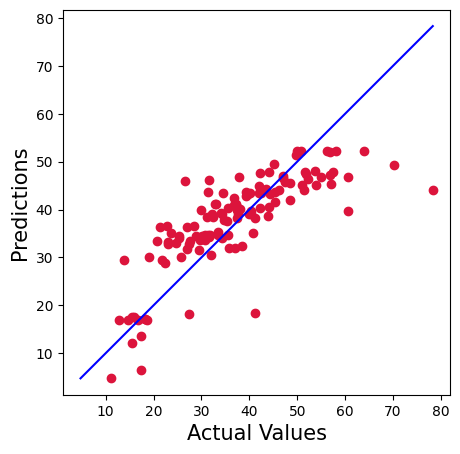

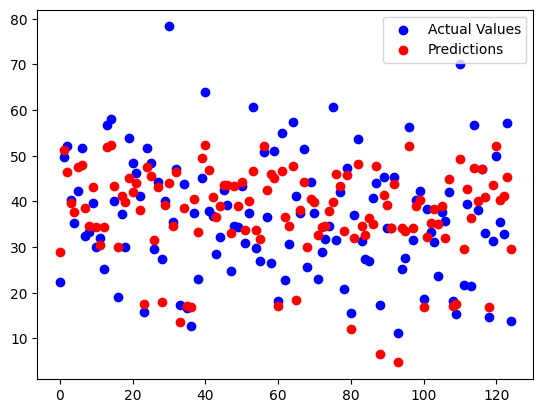

In [30]:
from sklearn.kernel_ridge import KernelRidge

exec_model(KernelRidge(alpha=1.0))

## Elastic-Net

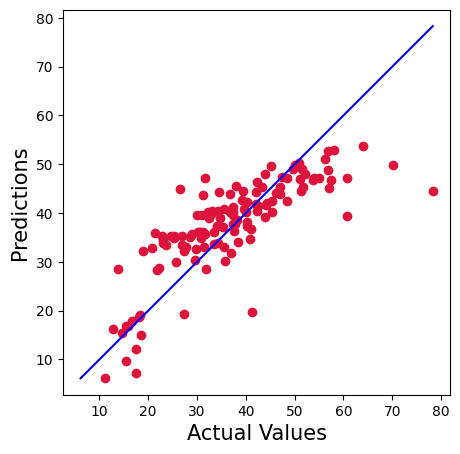

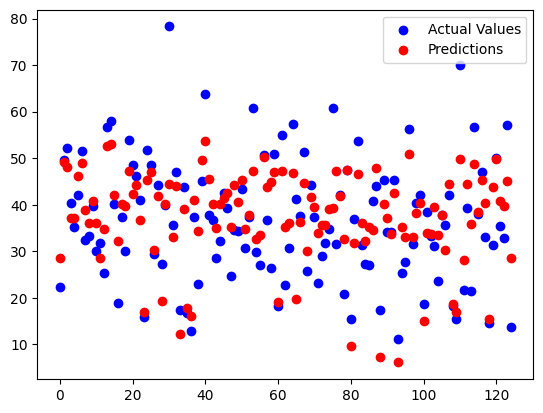

In [31]:
from sklearn import linear_model

exec_model(linear_model.LassoLars(alpha=.1, normalize=False))

## Voting Regressor

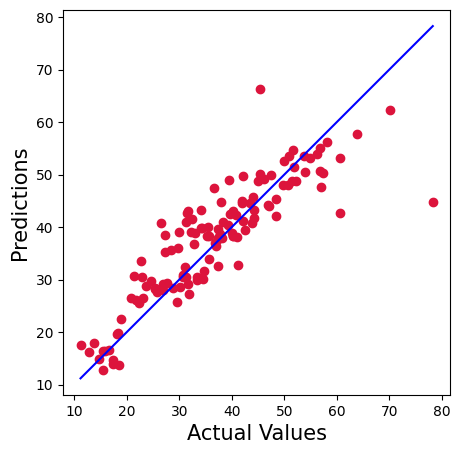

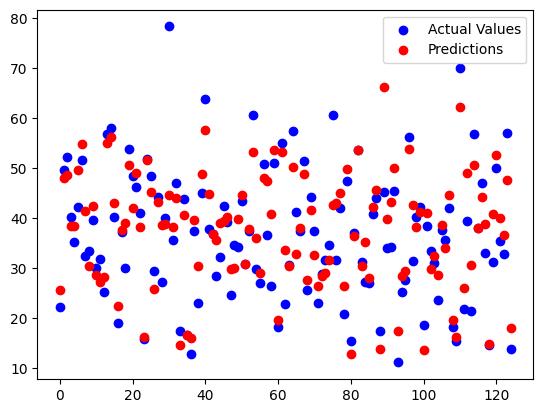

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor

reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()
exec_model(VotingRegressor(estimators=[('gb', reg1), ('rf', reg2), ('lr', reg3)]))

In [33]:
evaluation_df

,Model,Mean Absolute Error,Mean Squared Error,R2 Score,Explained Variance Score,Mean Pinball Loss,D2 Pinball Score,D2 Absolute Error Score
0,LinearRegression,5.807369,58.784165,58.784165,58.784165,58.784165,58.784165,58.784165
1,SVR,6.752284,77.531666,77.531666,77.531666,77.531666,77.531666,77.531666
2,Ridge,5.845810,60.457896,60.457896,60.457896,60.457896,60.457896,60.457896
3,KernelRidge,5.887689,61.874040,61.874040,61.874040,61.874040,61.874040,61.874040
4,LassoLars,5.833284,60.701502,60.701502,60.701502,60.701502,60.701502,60.701502
5,VotingRegressor,4.371088,38.831652,38.831652,38.831652,38.831652,38.831652,38.831652
